<a href="https://colab.research.google.com/github/crew-guy/Machine-Learning/blob/main/models/Binary_Classify_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text classify/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df[df['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
df.columns
df.columns[:-1]
len(df.columns[:-1])

8

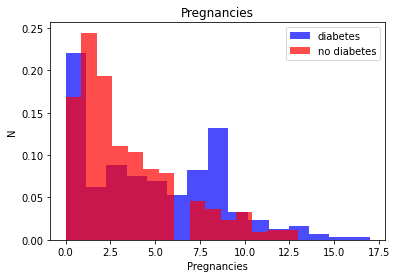

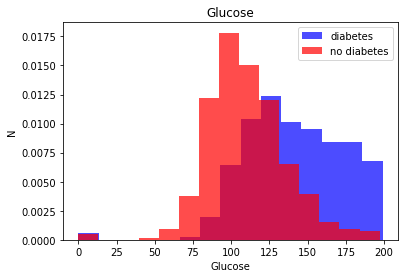

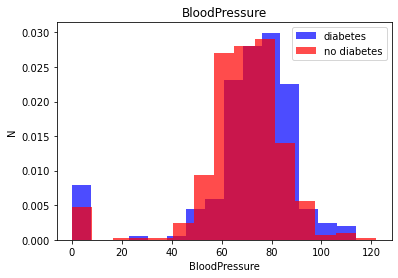

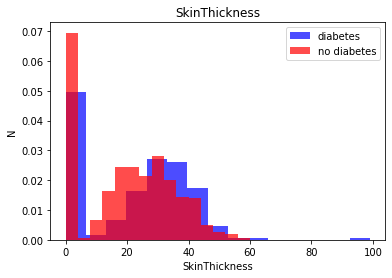

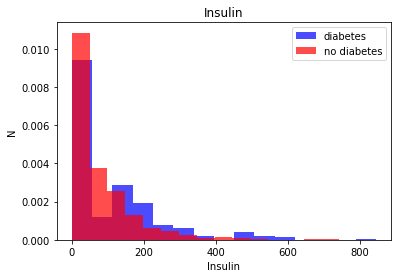

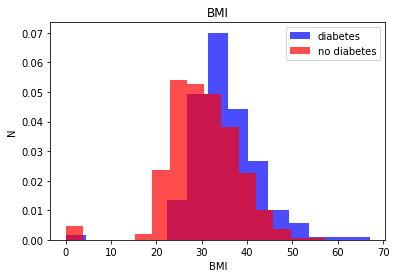

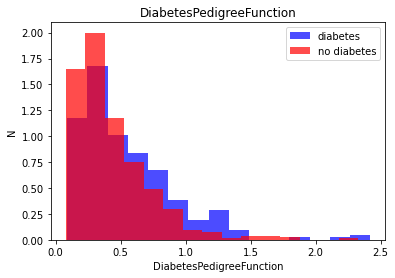

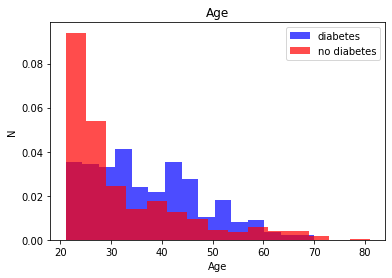

In [ ]:
for i in range(len(df.columns[:-1])):
    label=df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue',label='diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red', label='no diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel('N')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [ ]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [ ]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
X.shape, y.shape, (np.reshape(y, (-1,1)).shape)

((768, 8), (768,), (768, 1))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)

# oversample = RandomOverSampler(sampling_strategy='minority') This means that if the majority class had 1,000 examples and the minority class had 100, 
# this strategy would oversampling the minority class so that it has 1,000 examples.

data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

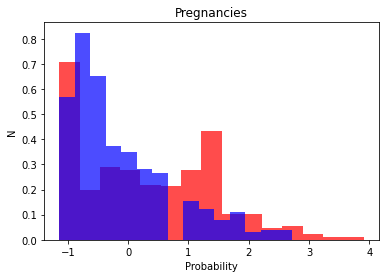

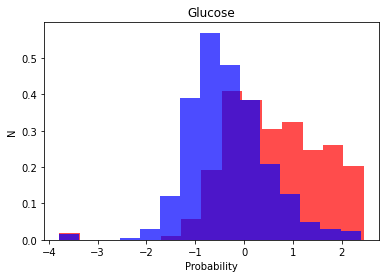

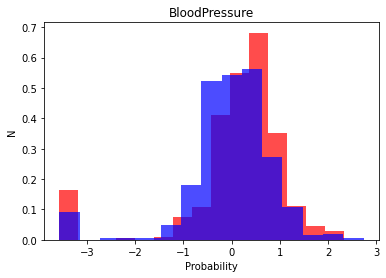

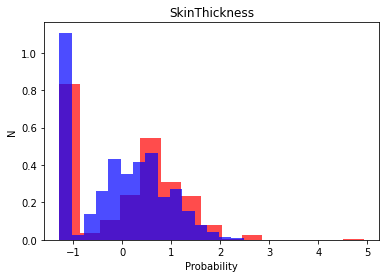

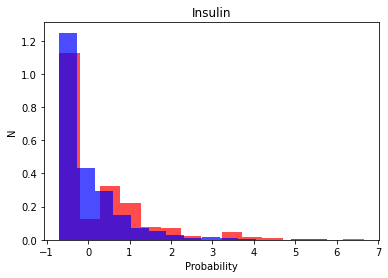

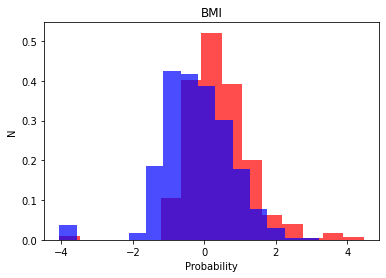

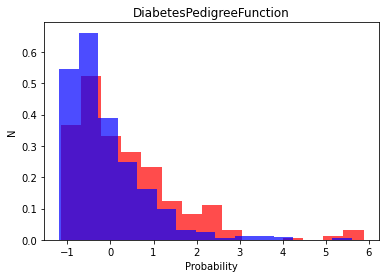

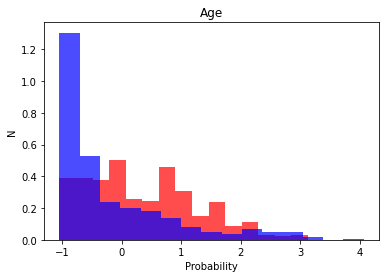

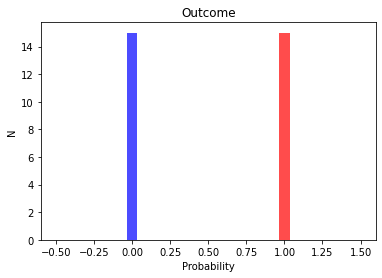

In [ ]:
for i in range(len(transformed_df.columns)):
    label = transformed_df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='red', density=True, label='diabetes', bins=15, alpha=0.7)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='blue', density=True, label='no diabetes', bins=15, alpha=0.7)
    plt.title(label)
    plt.xlabel('Probability')
    plt.ylabel('N')
    plt.show()

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6033


[0.6815123558044434, 0.6033333539962769]

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 7ms/step - loss: 0.6607 - accuracy: 0.6367 - val_loss: 0.6233 - val_accuracy: 0.7200
Epoch 2/20
38/38 [==============================] - 0s 6ms/step - loss: 0.6169 - accuracy: 0.7183 - val_loss: 0.5840 - val_accuracy: 0.7750
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5814 - accuracy: 0.7217 - val_loss: 0.5458 - val_accuracy: 0.7700
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5528 - accuracy: 0.7217 - val_loss: 0.5196 - val_accuracy: 0.7750
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5334 - accuracy: 0.7333 - val_loss: 0.4983 - val_accuracy: 0.7750
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5203 - accuracy: 0.7400 - val_loss: 0.4848 - val_accuracy: 0.7700
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5109 - accuracy: 0.7433 - val_loss: 0.4777 - val_accuracy: 0.7650
Epoch 8/20
38/38 [==

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4660 - accuracy: 0.7700


[0.4660223424434662, 0.7699999809265137]